In [6]:
%matplotlib inline

import matplotlib
import gym
import time
import numpy as np
import pandas as pd
import random
# import seaborn as sns
# from hiive.mdptoolbox import mdp
import matplotlib.pyplot as plt
import mdptoolbox, mdptoolbox.example
from mdptoolbox.mdp import ValueIteration, PolicyIteration, QLearning

In [7]:
def transition_and_reward(probabilities, s, a):
    transitions = np.empty((a, s, s))
    rewards = np.empty((a, s, s))
    for key, value in probabilities.items():
        for s_key, s_value in value.items():
            for ss_value in s_value:
                transitions[s_key][key][ss_value[1]] = ss_value[0]
                rewards[s_key][key][ss_value[1]] = ss_value[2]
    return transitions, rewards

In [8]:
def value_iteration(p, r):
    iterations = pd.DataFrame(columns=['gamma', 'iterations'])
    disrupted_times = pd.DataFrame(columns=['gamma', 'time'])
    policies = []
    for gamma in [0.7, 0.75, 0.85, 0.9, 0.99]:
        vi = ValueIteration(p, r, gamma)
        vi.run()
        policies.append(vi.policy)
        iterations = iterations.append({'gamma': gamma, 'iterations': vi.iter}, ignore_index=True)
        disrupted_times = disrupted_times.append({'gamma': gamma, 'time': vi.time}, ignore_index=True)
    return policies, iterations, disrupted_times

In [9]:
def policy_iteration(p, r):
    iterations = pd.DataFrame(columns=['gamma', 'iterations'])
    disrupted_times = pd.DataFrame(columns=['gamma', 'time'])
    policies = []
    for gamma in [0.7, 0.75, 0.85, 0.9, 0.99]:
        pi = PolicyIteration(p, r, gamma)
        pi.run()
        policies.append(pi.policy)
        iterations = iterations.append({'gamma': gamma, 'iterations': pi.iter}, ignore_index=True)
        disrupted_times = disrupted_times.append({'gamma': gamma, 'time': pi.time}, ignore_index=True)
    return policies, iterations, disrupted_times

In [10]:
def q_learning(p, r):
    mean_discrepancy = pd.DataFrame(columns=['gamma', 'mean_discrepancy'])
    disrupted_times = pd.DataFrame(columns=['gamma', 'time'])
    policies = []
    for gamma in [0.7, 0.75, 0.85, 0.9, 0.99]:
        ql = QLearning(p, r, gamma)
        ql.run()
        policies.append(ql.policy)
        mean_discrepancy = mean_discrepancy.append({'gamma': gamma, 'mean_discrepancy': ql.mean_discrepancy}, ignore_index=True)
        disrupted_times = disrupted_times.append({'gamma': gamma, 'time': ql.time}, ignore_index=True)
    return policies, mean_discrepancy, disrupted_times

# Taxi V3

In [24]:
env = gym.make("Taxi-v3").env
env.render()

+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+



In [25]:
transitions, rewards = transition_and_reward(env.P, 500, 6)

In [10]:
policies, iterations, disrupted_times = value_iteration(transitions, rewards)

## Value Iteration

In [11]:
policies, iterations, disrupted_times = value_iteration(transitions, rewards)

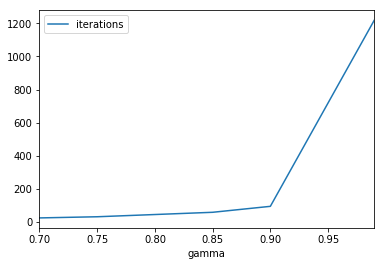

In [12]:
iterations.plot(x='gamma', y='iterations')

In [13]:
np.array(policies[-2])

array([4, 4, 4, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 5, 0, 0, 0, 3, 3,
       3, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0,
       2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 2, 2,
       2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 4, 4, 4, 4,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 5, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 1, 1, 1, 2, 2, 2, 2, 0, 0, 0, 0, 2, 2, 2, 2, 1, 2, 0, 2,
       1, 1, 1, 1, 2, 2, 2, 2, 3, 3, 3, 3, 2, 2, 2, 2, 1, 2, 3, 2, 3, 3,
       3, 3, 1, 1, 1, 1, 3, 3, 3, 3, 2, 2, 2, 2, 3, 1, 3, 2, 3, 3, 3, 3,
       1, 1, 1, 1, 3, 3, 3, 3, 0, 0, 0, 0, 3, 1, 3, 0, 3, 3, 3, 3, 1, 1,
       1, 1, 3, 3, 3, 3, 0, 0, 0, 0, 3, 1, 3, 0, 1,

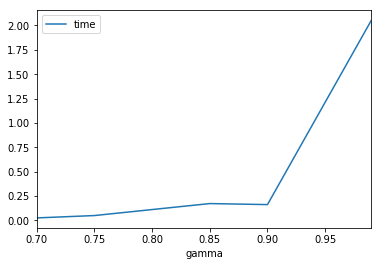

In [14]:
disrupted_times.plot(x='gamma', y='time')

## Policy Iteration

In [15]:
policies, iterations, disrupted_times = policy_iteration(transitions, rewards)

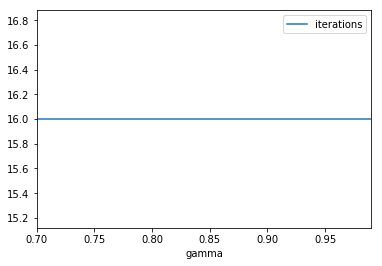

In [16]:
iterations.plot(x='gamma', y='iterations')

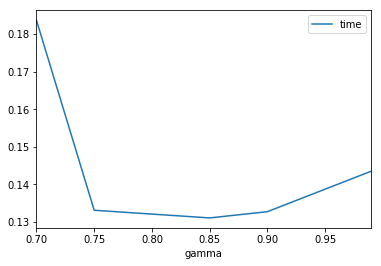

In [17]:
disrupted_times.plot(x='gamma', y='time')

## Q-Learning

In [26]:
P, R = np.zeros([env.observation_space.n]), np.zeros([env.action_space.n])

In [27]:
policies, mean_discrepancy, disrupted_times = q_learning(transitions, rewards)

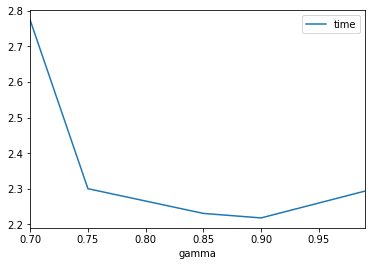

In [28]:
disrupted_times.plot(x='gamma', y='time')

# Fire Management

In [30]:
# from firemdp import *
import mdptoolbox.example

In [47]:
# P, R = getTransitionAndRewardArrays(0.5)
P, R = mdptoolbox.example.forest()

## Value Iteration

In [12]:
policies, iterations, disrupted_times = value_iteration(P, R)

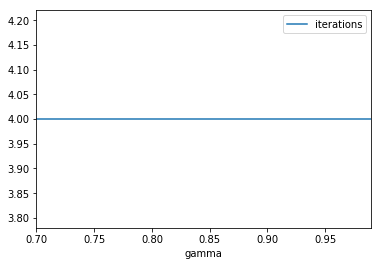

In [13]:
iterations.plot(x='gamma', y='iterations')

In [14]:
np.array(policies[-2])

array([0, 0, 0])

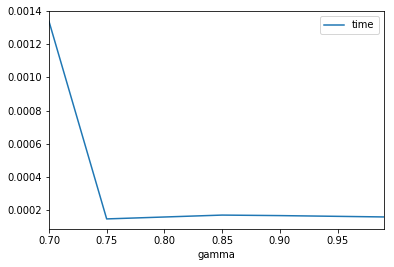

In [15]:
disrupted_times.plot(x='gamma', y='time')

## Policy Iteration

In [16]:
policies, iterations, disrupted_times = policy_iteration(P, R)

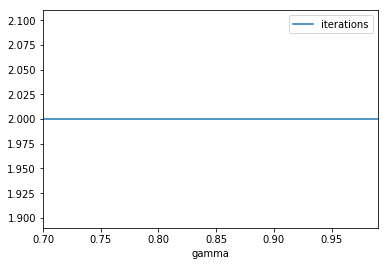

In [17]:
iterations.plot(x='gamma', y='iterations')

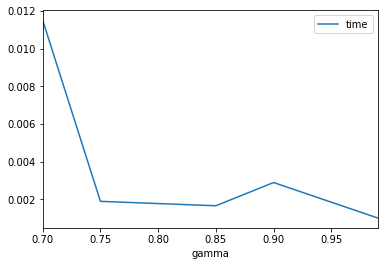

In [18]:
disrupted_times.plot(x='gamma', y='time')

## Q Learning

In [66]:
R = np.zeros([3,2])

In [67]:
P = np.array([[[0.3, 0.4, 0.3],
        [0.3, 0.4, 0.3],
        [0.3, 0.4, 0.3]],
       [[0.3 , 0.4, 0.3],
        [0.3 , 0.4, 0.3],
        [0.3 , 0.4 , 0.3]]])

In [68]:
policies, mean_discrepancy, disrupted_times = q_learning(P, R)

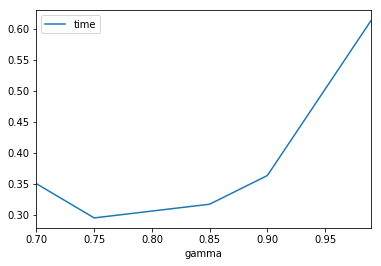

In [69]:
disrupted_times.plot(x='gamma', y='time')